## Download testing data

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import driveanon

In [3]:
# %%capture
# driveanon.save('13agtkTBW9HydkjwnquIt6axiDvbg1D9p', filename='data.tar.gz')
# ! tar -xzvf data.tar.gz
# ! rm data.tar.gz

## Plot difference maps

In [4]:
import glacierpoly as gpoly
import glob
import geopandas as gpd

In [5]:
diffs = sorted(glob.glob('data/diff*.tif'))
gdf = gpd.read_file('data/south_cascade_rgi_polygon.geojson')

'data/diff_dem_ref_1970-09-29.tif'

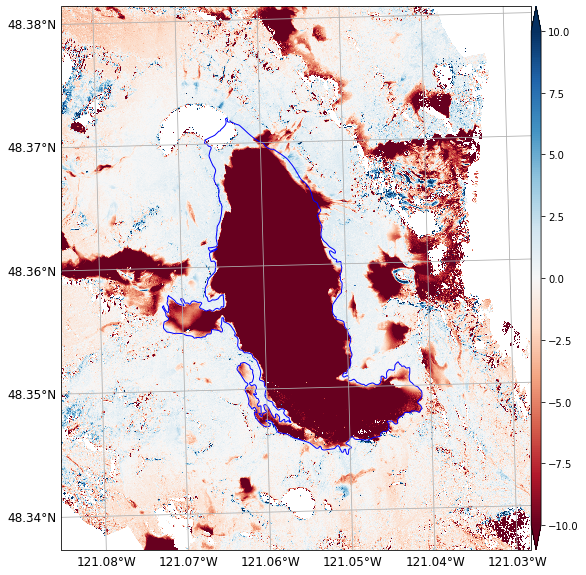

In [6]:
gpoly.plotting.plot_tif(diffs[0], 
                        glacier_outline_gdf=gdf, 
                        vmin=-10,vmax=10,
                        cmap='RdBu')
diffs[0]

'data/diff_dem_ref_1994-09-06.tif'

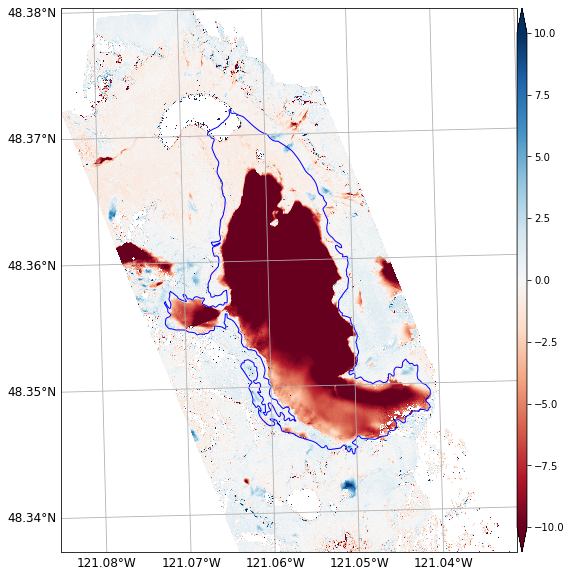

In [7]:
gpoly.plotting.plot_tif(diffs[-3], 
                        glacier_outline_gdf=gdf, 
                        vmin=-10,vmax=10,
                        cmap='RdBu')
diffs[-3]

## Detect edges

In [8]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [9]:
source = rasterio.open(diffs[0],masked=True)
array = source.read(1)
array = np.uint8(array)
canny = cv2.Canny(array,50,150)

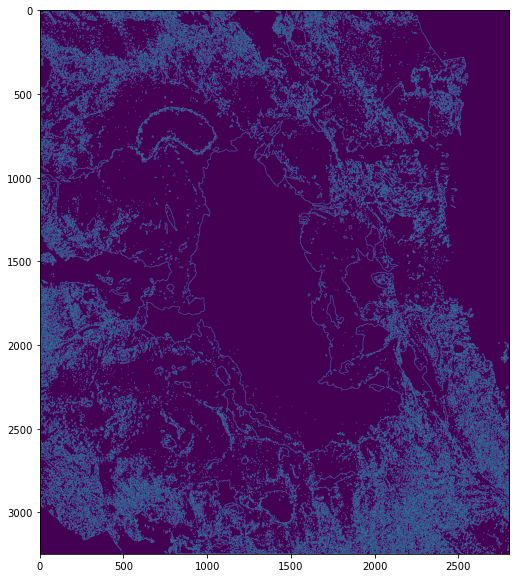

In [10]:
fig,ax = plt.subplots(figsize=(10,10))
ax.imshow(canny)

## Derive additional candidate predictors from DEM
https://gdal.org/programs/gdaldem.html

In [11]:
# %%bash
# cd data/

# fn_list=$(ls dem*.tif)
#
# parallel --progress "gdaldem hillshade {} hs_{.}.tif" ::: $fn_list
# rename 's/hs_dem/hillshade/g' hs_dem*.tif
#
# parallel --progress "gdaldem slope {} sl_{.}.tif" ::: $fn_list
# rename 's/sl_dem/slope/g' sl_dem*.tif
#
# parallel --progress "gdaldem aspect {} asp_{.}.tif" ::: $fn_list
# rename 's/asp_dem/aspect/g' asp_dem*.tif
#
# parallel --progress "gdaldem TRI {} TRI_{.}.tif" ::: $fn_list
# rename 's/TRI_dem/TRI/g' TRI_dem*.tif
#
# parallel --progress "gdaldem roughness {} rn_{.}.tif" ::: $fn_list
# rename 's/rn_dem/roughness/g' rn_dem*.tif

# cd ..

In [12]:
hillshades = sorted(glob.glob('data/hillshade*.tif'))
TRIs = sorted(glob.glob('data/TRI*.tif'))
slopes = sorted(glob.glob('data/slope*.tif'))
aspects = sorted(glob.glob('data/aspect*.tif'))
roughness = sorted(glob.glob('data/roughness*.tif'))

## Hillshade

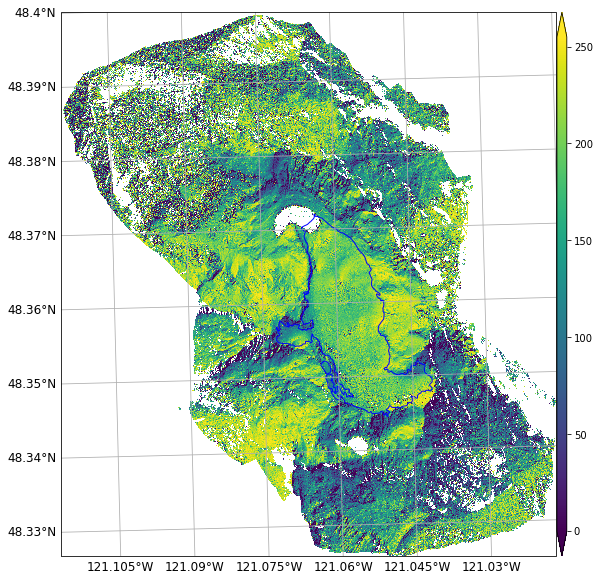

In [13]:
gpoly.plotting.plot_tif(hillshades[0], 
                        glacier_outline_gdf=gdf)

## Slope

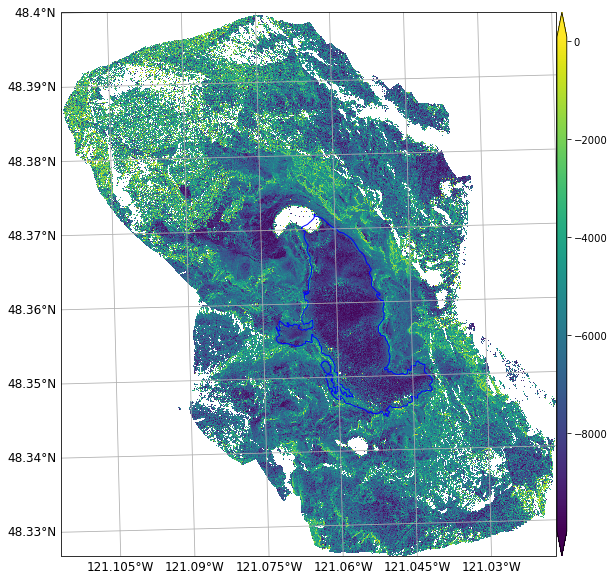

In [14]:
gpoly.plotting.plot_tif(slopes[0], 
                        glacier_outline_gdf=gdf)

## Aspect

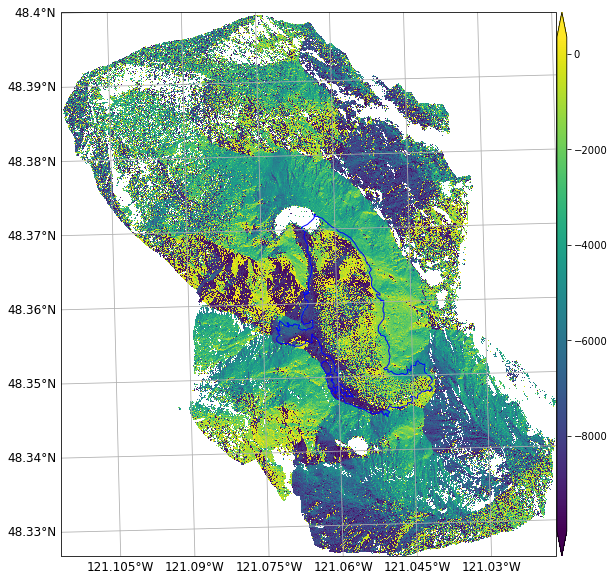

In [15]:
gpoly.plotting.plot_tif(aspects[0], 
                        glacier_outline_gdf=gdf)

## Roughness

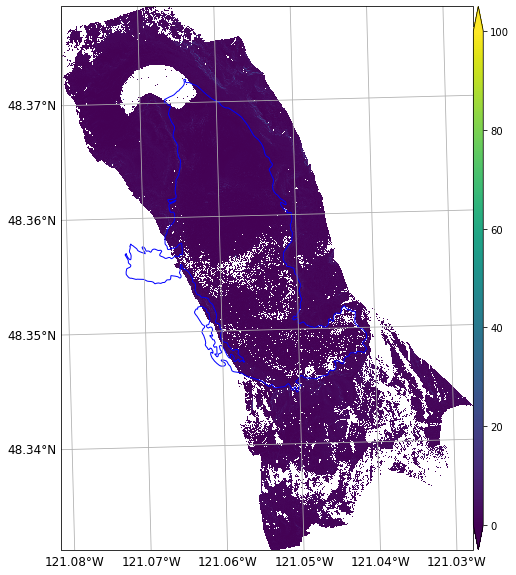

In [16]:
gpoly.plotting.plot_tif(roughness[1], 
                        vmin=0,
                        vmax=100,
                        glacier_outline_gdf=gdf)